**1. Import libraries**

In [288]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import xgboost as xgb
from xgboost import XGBRegressor


**2. Explore The Dataset**

In [289]:
sales = pd.read_csv('/content/sales.csv', index_col=0)

In [290]:
sales.shape

(640840, 9)

In [291]:
sales.head()

,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales
425390,366,4,2013-04-18,517,1,0,0,0,4422
291687,394,6,2015-04-11,694,1,0,0,0,8297
411278,807,4,2013-08-29,970,1,1,0,0,9729
664714,802,2,2013-05-28,473,1,1,0,0,6513
540835,726,4,2013-10-10,1068,1,1,0,0,10882


In [292]:
sales.columns

Index(['store_ID', 'day_of_week', 'date', 'nb_customers_on_day', 'open',
       'promotion', 'state_holiday', 'school_holiday', 'sales'],
      dtype='object')

In [293]:
sales.isna().sum()

,0
store_ID,0
day_of_week,0
date,0
nb_customers_on_day,0
open,0
promotion,0
state_holiday,0
school_holiday,0
sales,0


array([[<Axes: title={'center': 'store_ID'}>,
        <Axes: title={'center': 'day_of_week'}>,
        <Axes: title={'center': 'nb_customers_on_day'}>],
       [<Axes: title={'center': 'open'}>,
        <Axes: title={'center': 'promotion'}>,
        <Axes: title={'center': 'school_holiday'}>],
       [<Axes: title={'center': 'sales'}>, <Axes: >, <Axes: >]],
      dtype=object)

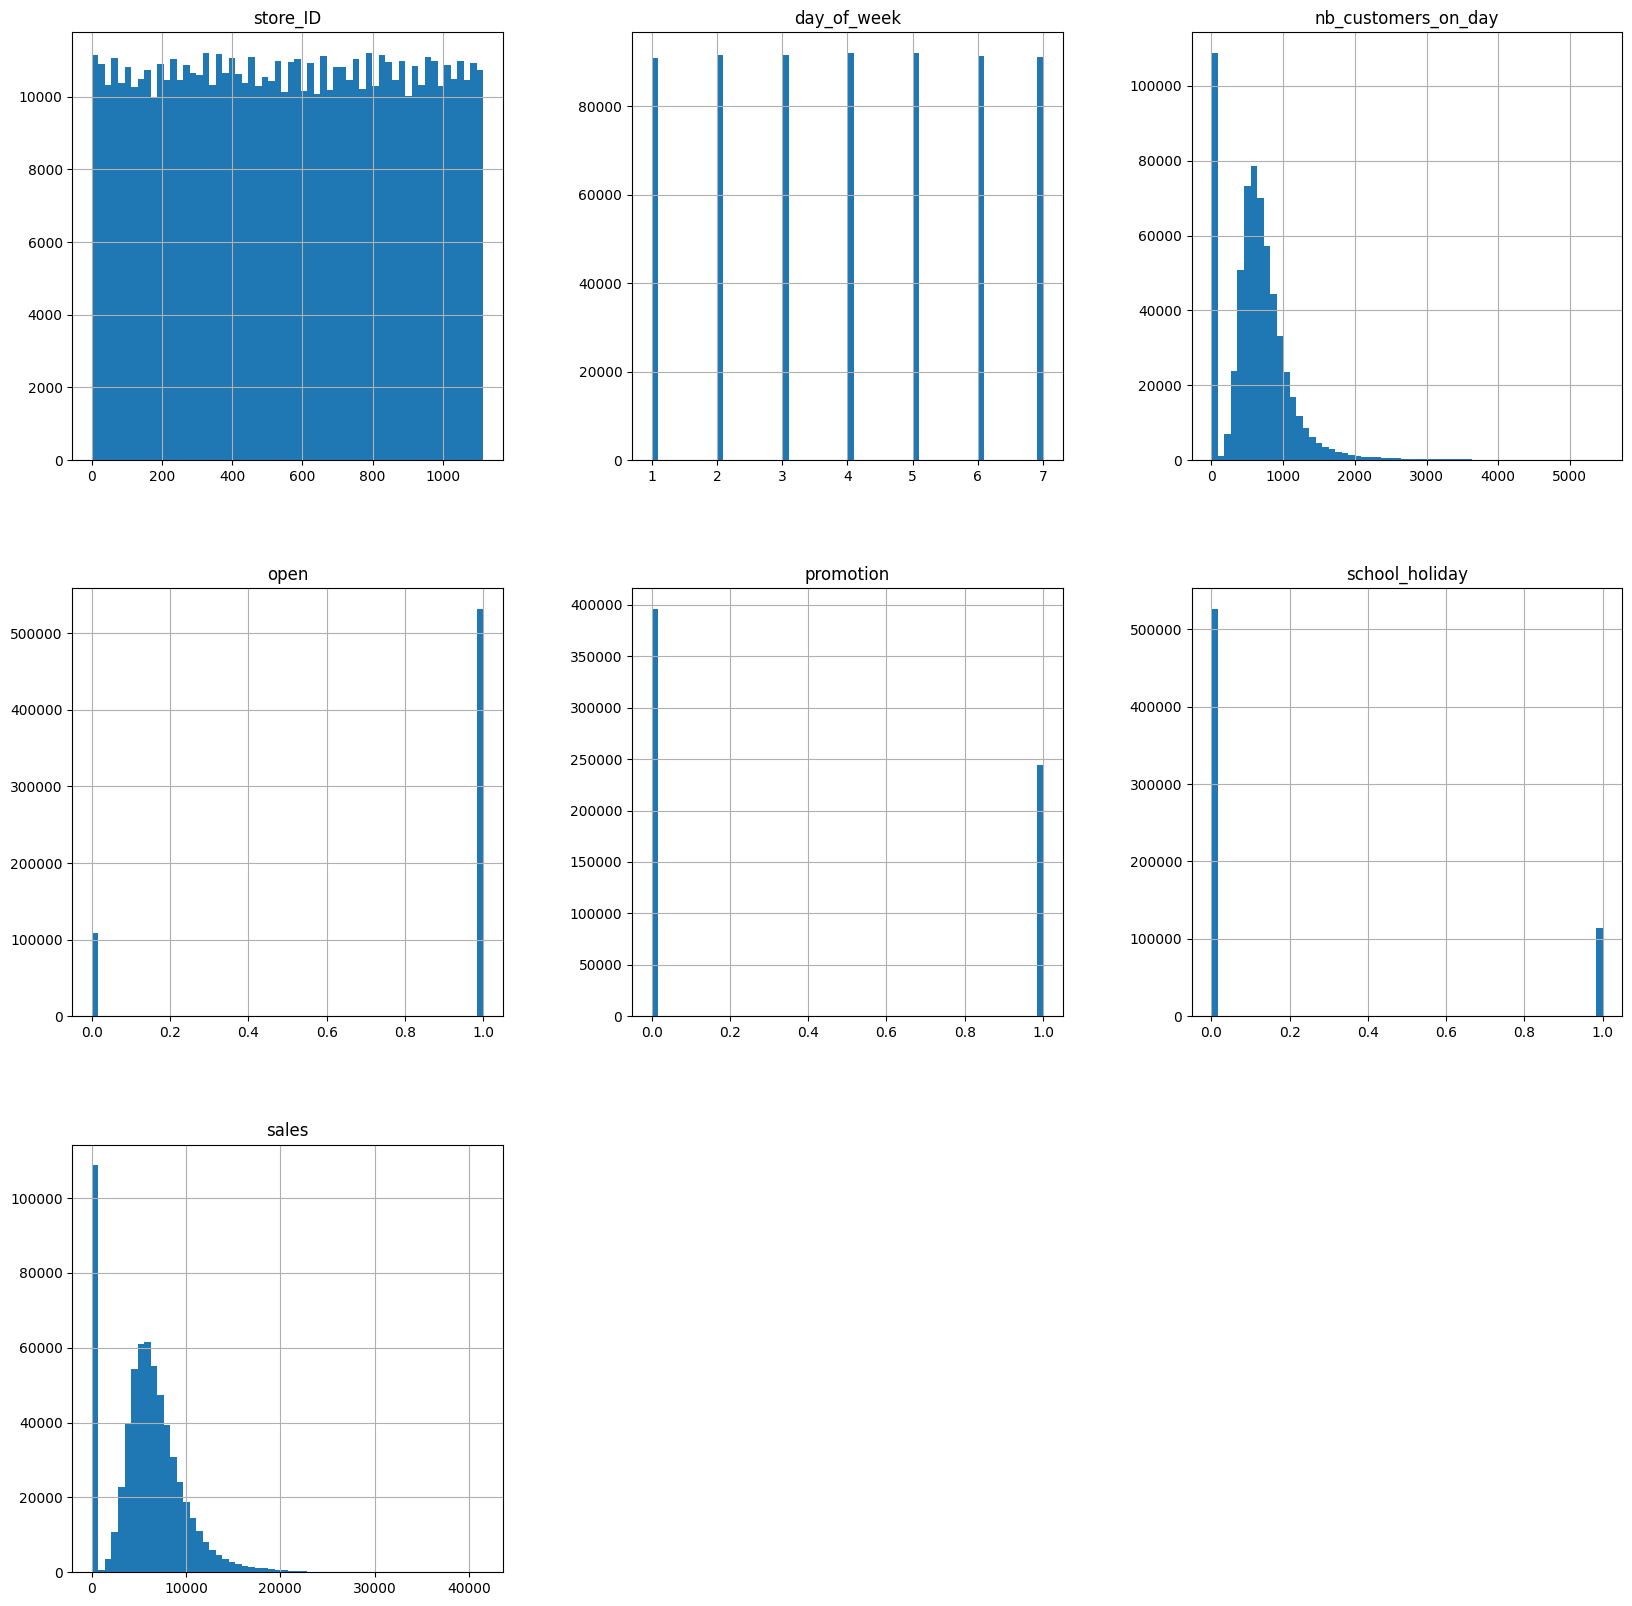

In [294]:
sales.hist(bins=60, figsize=(20,20))

In [295]:
sales.dtypes

,0
store_ID,int64
day_of_week,int64
date,object
nb_customers_on_day,int64
open,int64
promotion,int64
state_holiday,object
school_holiday,int64
sales,int64


In [296]:
sales.describe()

,store_ID,day_of_week,nb_customers_on_day,open,promotion,school_holiday,sales
count,640840.000000,640840.000000,640840.000000,640840.000000,640840.000000,640840.000000,640840.000000
mean,558.211348,4.000189,633.398577,0.830185,0.381718,0.178472,5777.469011
std,321.878521,1.996478,464.094416,0.375470,0.485808,0.382910,3851.338083
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,280.000000,2.000000,405.000000,1.000000,0.000000,0.000000,3731.000000
50%,558.000000,4.000000,609.000000,1.000000,0.000000,0.000000,5746.000000
75%,837.000000,6.000000,838.000000,1.000000,1.000000,0.000000,7860.000000
max,1115.000000,7.000000,5458.000000,1.000000,1.000000,1.000000,41551.000000


In [297]:
sales['state_holiday'].value_counts()  #exploring categ...

,count
state_holiday,
0,621160
a,12842
b,4214
c,2624


In [298]:
sales['school_holiday'].value_counts()

,count
school_holiday,
0,526468
1,114372


In [ ]:
# convert... feature eng

In [299]:
sales['state_holiday'] = (sales['state_holiday'] != '0').astype(int)

In [300]:
sales['state_holiday'].value_counts()

,count
state_holiday,
0,621160
1,19680


In [301]:
sales.dtypes

,0
store_ID,int64
day_of_week,int64
date,object
nb_customers_on_day,int64
open,int64
promotion,int64
state_holiday,int64
school_holiday,int64
sales,int64


In [302]:
# convert date into datetime frame
sales['date'] = pd.to_datetime(sales['date'])


In [303]:
# model
X_sales=sales[['store_ID', 'day_of_week', 'nb_customers_on_day', 'open',
       'promotion', 'state_holiday', 'school_holiday']] #features
y_sales=sales['sales'] #target

In [304]:
X_train, X_test, y_train, y_test = train_test_split(
    X_sales, y_sales, test_size=0.2, random_state=42,shuffle=False
    )

In [389]:
 #Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the model
# model = LinearRegression()
# model.fit(X_train_scaled, y_train)

In [306]:
y_train

,sales
425390,4422
291687,8297
411278,9729
664714,6513
540835,10882
...,...
698267,13214
486056,0
515767,0
26987,10676


In [307]:
X_test

,store_ID,day_of_week,nb_customers_on_day,open,promotion,state_holiday,school_holiday
520796,140,5,933,1,1,0,0
616523,456,5,827,1,0,0,0
662934,376,5,936,1,1,0,1
513163,614,6,1727,1,0,0,0
604538,649,5,447,1,1,0,0
...,...,...,...,...,...,...,...
359783,409,6,483,1,0,0,0
152315,97,1,987,1,1,0,0
117952,987,1,925,1,0,0,0
435829,1084,4,725,1,0,0,0


In [308]:
y_pred = model.predict(X_test_scaled)



# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.4f}")

Mean Absolute Error (MAE): 980.7848


----------------------

In [309]:
# sort date ascendingly
sales = sales.sort_values(by='date', ascending=True)

# extract day, month, and year
sales['day'] = sales['date'].dt.day
sales['month'] = sales['date'].dt.month
sales['year'] = sales['date'].dt.year

sales


,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales,day,month,year
678554,401,2,2013-01-01,0,0,0,1,1,0,1,1,2013
613446,679,2,2013-01-01,0,0,0,1,1,0,1,1,2013
481068,892,2,2013-01-01,0,0,0,1,1,0,1,1,2013
587786,312,2,2013-01-01,0,0,0,1,1,0,1,1,2013
200285,250,2,2013-01-01,0,0,0,1,1,0,1,1,2013
...,...,...,...,...,...,...,...,...,...,...,...,...
704936,621,5,2015-07-31,870,1,1,0,1,7296,31,7,2015
399507,385,5,2015-07-31,740,1,1,0,0,8807,31,7,2015
680642,96,5,2015-07-31,612,1,1,0,1,6370,31,7,2015
468532,914,5,2015-07-31,1178,1,1,0,1,11972,31,7,2015


In [310]:
sales.drop('store_ID', axis=1, inplace=True)
sales.drop('date', axis=1, inplace=True)

In [311]:
sales

,day_of_week,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales,day,month,year
678554,2,0,0,0,1,1,0,1,1,2013
613446,2,0,0,0,1,1,0,1,1,2013
481068,2,0,0,0,1,1,0,1,1,2013
587786,2,0,0,0,1,1,0,1,1,2013
200285,2,0,0,0,1,1,0,1,1,2013
...,...,...,...,...,...,...,...,...,...,...
704936,5,870,1,1,0,1,7296,31,7,2015
399507,5,740,1,1,0,0,8807,31,7,2015
680642,5,612,1,1,0,1,6370,31,7,2015
468532,5,1178,1,1,0,1,11972,31,7,2015


In [312]:
# model
X_sales=sales[['day_of_week', 'nb_customers_on_day', 'open',
       'promotion', 'state_holiday', 'school_holiday','day','month','year']] #features
y_sales=sales['sales'] #target

In [313]:
X_train, X_test, y_train, y_test = train_test_split(
    X_sales, y_sales, test_size=0.2, random_state=42,shuffle=False
    )

In [314]:
 #Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test)

# Train the model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [315]:
y_pred = model.predict(X_test_scaled)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.4f}")

Mean Absolute Error (MAE): 1000.7157


In [316]:
sales['nb_customers_on_day'].value_counts()

,count
nb_customers_on_day,
0,108854
560,1539
517,1507
571,1493
528,1492
...,...
4110,1
3797,1
3686,1


<Axes: xlabel='nb_customers_on_day', ylabel='sales'>

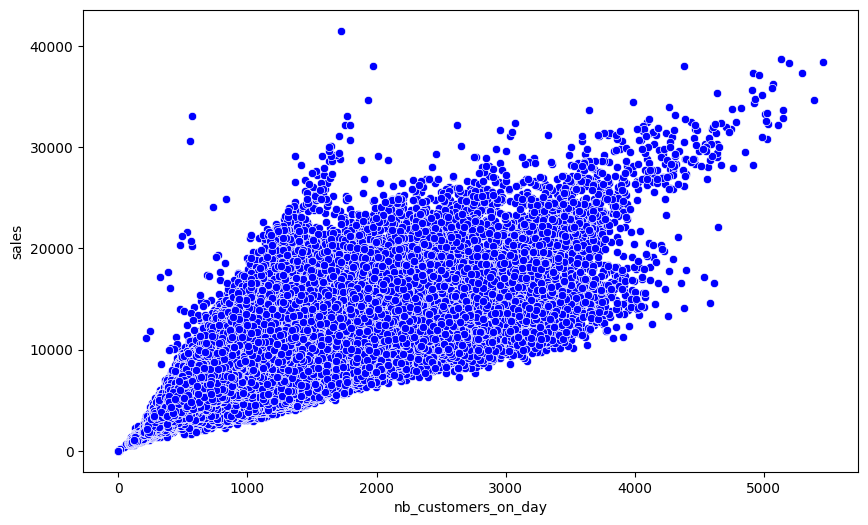

In [317]:
plt.figure(figsize=(10, 6))  # Set the size of the plot
sns.scatterplot(data=sales, x='nb_customers_on_day', y='sales', color='blue')

In [320]:
X_sales=sales[[ 'day_of_week', 'nb_customers_on_day', 'open',
       'promotion', 'state_holiday', 'school_holiday']] #features
y_sales=sales['sales'] #target

In [321]:
X_sales

,day_of_week,nb_customers_on_day,open,promotion,state_holiday,school_holiday
678554,2,0,0,0,1,1
613446,2,0,0,0,1,1
481068,2,0,0,0,1,1
587786,2,0,0,0,1,1
200285,2,0,0,0,1,1
...,...,...,...,...,...,...
704936,5,870,1,1,0,1
399507,5,740,1,1,0,0
680642,5,612,1,1,0,1
468532,5,1178,1,1,0,1


In [322]:
X_train, X_test, y_train, y_test = train_test_split(
    X_sales, y_sales, test_size=0.2, random_state=42,shuffle=False
    )

------------------------------**XGBoost**


In [323]:
X_sales=sales[['day_of_week', 'nb_customers_on_day', 'open',
       'promotion', 'state_holiday', 'school_holiday', 'month', 'year']] #features
y_sales=sales['sales'] #target

In [324]:
X_train, X_test, y_train, y_test = train_test_split(
    X_sales, y_sales, test_size=0.2, random_state=42,shuffle=False
    )

In [325]:
model = xgb.XGBRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

Mean Absolute Error: 913.7285875639877


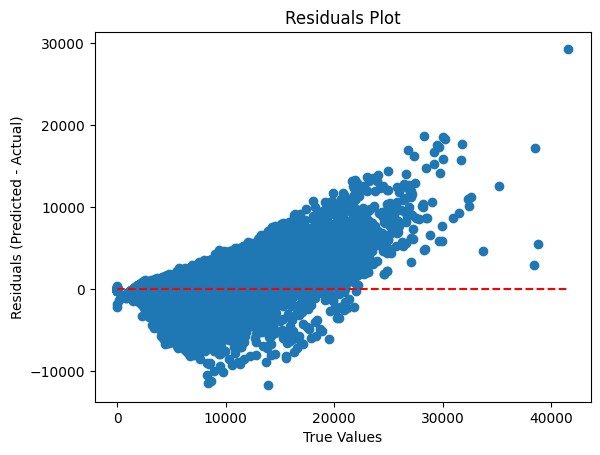

In [326]:
residuals = y_test - y_pred

# Scatter plot of residuals
plt.scatter(y_test, residuals)
plt.hlines(y=0, xmin=min(y_test), xmax=max(y_test), colors='r', linestyles='dashed')
plt.xlabel("True Values")
plt.ylabel("Residuals (Predicted - Actual)")
plt.title("Residuals Plot")
plt.show()

-------------------


In [327]:

X_train, X_test, y_train, y_test = train_test_split(
    X_sales, y_sales, test_size=0.2, random_state=42,shuffle=False
    )


model = XGBRegressor(
    learning_rate=0.1,
    n_estimators=100,
    max_depth=7,
    min_child_weight=1,
    gamma=0,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.1,
    reg_lambda=1,
    random_state=42
)

model.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=False)
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae}")


MAE: 910.7346306085135


In [332]:
from sklearn.model_selection import GridSearchCV, PredefinedSplit
def select_model(X_train, y_train, X_test, y_test):
    params = {
        'n_estimators': [50, 150],
        'max_depth': [None, 10, 20, 30]
    }

    x_combined = pd.concat([X_train, X_test])
    y_combined = np.concatenate([y_train, y_test])

    split_index = [-1] * len(X_train) + [0] * len(X_test)
    pds = PredefinedSplit(test_fold=split_index)

    xgb_model = XGBRegressor(random_state=42)

    grid_search = GridSearchCV(
        estimator=xgb_model,
        param_grid=params,
        cv=pds,
        scoring='neg_mean_absolute_error',
        verbose=1
    )
    grid_search.fit(x_combined, y_combined)

    best_model = grid_search.best_estimator_
    print(f"Best params: {grid_search.best_params_} for accuracy {grid_search.best_score_}")
    print (best_model)



       # Fit the model
    grid_search.fit(x_combined, y_combined)

    # Extract the best model
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    best_score = -grid_search.best_score_  # Convert back to positive as scoring is negated

    # Train and evaluate the best model
    best_model.fit(X_train, y_train)  # Train on the training data
    y_pred = best_model.predict(X_test)  # Predict on the test data
    mae = mean_absolute_error(y_test, y_pred)  # Calculate MAE

    # Print results
    print("\n--- Grid Search Results ---")
    print(f"Best Parameters: {best_params}")
    print(f"Best Cross-Validation MAE: {best_score:.4f}")
    print("\n--- Evaluation on Test Data ---")
    print(f"Test Data MAE: {mae:.4f}")
    print("\nBest Model Details:")
    print(best_model)
    return best_model, mae, best_params

In [333]:
best_model, mae, best_params = select_model(X_train, y_train, X_test, y_test)

Fitting 1 folds for each of 8 candidates, totalling 8 fits
Best params: {'max_depth': None, 'n_estimators': 50} for accuracy -910.6344962780763
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=50, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)
Fitting 1 folds for each of 8 candidates, totalling 8 fits

--- Grid Search Results ---
Best Parameters: {'max_de

In [390]:
real_data = pd.read_csv('/content/real_data_sales.csv')

In [391]:
real_data.head()

,index,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday
0,272371,415,7,01/03/2015,0,0,0,0,0
1,558468,27,7,29/12/2013,0,0,0,0,0
2,76950,404,3,19/03/2014,657,1,1,0,0
3,77556,683,2,29/01/2013,862,1,0,0,0
4,456344,920,3,19/03/2014,591,1,1,0,0


In [392]:
real_data['state_holiday'] = (real_data['state_holiday'] != '0').astype(int)

In [393]:
real_data['date'] = pd.to_datetime(real_data['date'], dayfirst=True)



In [394]:
real_data['day'] = real_data['date'].dt.day
real_data['month'] = real_data['date'].dt.month
real_data['year'] = real_data['date'].dt.year

real_data


,index,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday,day,month,year
0,272371,415,7,2015-03-01,0,0,0,0,0,1,3,2015
1,558468,27,7,2013-12-29,0,0,0,0,0,29,12,2013
2,76950,404,3,2014-03-19,657,1,1,0,0,19,3,2014
3,77556,683,2,2013-01-29,862,1,0,0,0,29,1,2013
4,456344,920,3,2014-03-19,591,1,1,0,0,19,3,2014
...,...,...,...,...,...,...,...,...,...,...,...,...
71200,59062,441,7,2014-10-26,0,0,0,0,0,26,10,2014
71201,687449,377,7,2013-08-18,0,0,0,0,0,18,8,2013
71202,207393,15,3,2014-06-11,648,1,0,0,0,11,6,2014
71203,233378,950,2,2013-04-23,626,1,1,0,0,23,4,2013


In [395]:
real_data.drop('store_ID', axis=1, inplace=True)
real_data.drop('date', axis=1, inplace=True)
#real_data.drop('index', axis=1, inplace=True)

In [396]:
real_data_for_prediction = real_data[['day_of_week', 'nb_customers_on_day', 'open',
                                       'promotion', 'state_holiday', 'school_holiday',
                                       'month', 'year']]

In [398]:
# Scale the data for prediction using the same scaler used during training
# scaler = StandardScaler()
# real_data_scaled = scaler.transform(real_data_for_prediction)

# Make predictions
y_pred_real = best_model.predict(real_data_for_prediction)

# Print the predictions
print("Predictions on real data:", y_pred_real)

Predictions on real data: [-2.0584142e+00  5.6526184e+00  6.6118154e+03 ...  5.6311611e+03
  6.6048403e+03  7.8407324e+03]


In [399]:
y_pred_real = pd.Series(y_pred_real, name="preds")

In [403]:
y_pred_final = y_pred_real.apply(lambda x: max(0, x))

In [404]:
y_pred_final.to_csv('predictions_bright_minds.csv', index=True)